<!-- Project Header -->
<p style="padding:10px;background-color:#1582e8;margin:15;color:white;font-family:newtimeroman;font-size:180%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">
💼 Employee Salary Prediction using 📈 Linear Regression (End-to-End ML Project)
</p>

<!-- Project Image -->
<p style="text-align:center;">
<a href="https://ibb.co/S4hHsPzD"><img src="https://i.ibb.co/Rkxtv9qG/businessman-giving-money-his-partner-while-making-contract-1.jpg" alt="businessman-giving-money-his-partner-while-making-contract-1" border="0" style='width: 800px; height: 350px';></a>
</p>

<!-- Project Description -->
<p style="text-align:justify; font-family:'Comic Sans MS'; font-size:18px; color:#006400;">
Employee compensation is influenced by several factors such as experience, education level, job role, and department. Predicting salaries based on these features can help HR teams make data-driven decisions, avoid pay gaps, and optimize recruitment strategies. In this project, we analyze employee data and use a Linear Regression model to predict salaries. Through thorough EDA, feature engineering, and evaluation, we aim to build a robust salary prediction model.
</p>

<!-- Table of Contents -->
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#b7e50e;margin:10;color:black;font-family:newtimeroman;font-size:180%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>

| No | Contents | No | Contents |
|:--:|:---------|:--:|:---------|
| 1 | [<font color="#0f4c5c">Importing Libraries</font>](#1) | 7 | [<font color="#0f4c5c">Feature Engineering</font>](#7) |
| 2 | [<font color="#0f4c5c">About Dataset</font>](#2) | 8 | [<font color="#0f4c5c">Model Building</font>](#8) |
| 3 | [<font color="#0f4c5c">Data Overview</font>](#3) | 9 | [<font color="#0f4c5c">Model Evaluation</font>](#9) |
| 4 | [<font color="#0f4c5c">Data Cleaning</font>](#4) | 10 | [<font color="#0f4c5c">Visualizing Predictions</font>](#10) |
| 5 | [<font color="#0f4c5c">Exploratory Data Analysis</font>](#5) | 11 | [<font color="#0f4c5c">Conclusion & Insights</font>](#11) |
| 6 | [<font color="#0f4c5c">Correlation Analysis</font>](#6) | 12 | [<font color="#0f4c5c">Thank You</font>](#12) |


<a id="1"></a>
<p style="padding:10px;background-color:#b7e50e;margin:0;color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
# General-purpose libraries
import math as m
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly.offline import iplot

# Preprocessing & Pipelines
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer        
from sklearn.pipeline import Pipeline                

# Model selection & evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error          

# Machine Learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  

# Saving model
import joblib

# Optional Pandas settings
pd.set_option('future.no_silent_downcasting', True)
pd.options.mode.copy_on_write = "warn"



<a id="2"></a>
# <p style="padding:10px;background-color:#b7e50e;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

**About Dataset**

This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

**Columns:**

* **Age**: This column represents the age of each employee in years. The values in this column are numeric.

* **Gender**: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

* **Education Level**: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

* **Job Title**: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

* **Years of Experience**: This column represents the number of years of work experience of each employee. The values in this column are numeric.

* **Salary**: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

In [2]:
df = pd.read_csv("/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv")

<a id="3"></a>
# <p style="padding:10px;background-color:#b7e50e;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Overview</p>


**Let's have a glimpse of the Salary dataset.**

In [3]:
print(f"Shape of The Dataset : {df.shape}")
print(f"\nGlimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#d80747","color":"white","border": "1.5px  solid black",  "padding": "10px"})

Shape of The Dataset : (375, 6)

Glimpse of The Dataset :


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.000000,Male,Bachelor's,Software Engineer,5.000000,90000.000000
1,28.000000,Female,Master's,Data Analyst,3.000000,65000.000000
2,45.000000,Male,PhD,Senior Manager,15.000000,150000.000000
3,36.000000,Female,Bachelor's,Sales Associate,7.000000,60000.000000
4,52.000000,Male,Master's,Director,20.000000,200000.000000


In [4]:
info_df = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum().values,
    "Dtype": df.dtypes.values
})

info_df.style.set_properties(
    **{
        "background-color": "#d80747","color": "white","border": "1.5px solid black","padding": "10px","margin": "5px"
    }
)

,Column,Non-Null Count,Dtype
0,Age,373,float64
1,Gender,373,object
2,Education Level,373,object
3,Job Title,373,object
4,Years of Experience,373,float64
5,Salary,373,float64


In [5]:
print(f"Summary of The Salary Dataset :")
df.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of The Salary Dataset :


,count,mean,std,min,25%,50%,75%,max
Age,373.000000,37.431635,7.069073,23.000000,31.000000,36.000000,44.000000,53.000000
Years of Experience,373.000000,10.030831,6.557007,0.000000,4.000000,9.000000,15.000000,25.000000
Salary,373.000000,100577.345845,48240.013482,350.000000,55000.000000,95000.000000,140000.000000,250000.000000


**🔍 Interpretation:**

   * The average age of employees is around 37 years.

   * The average work experience is 10 years.

   * Salaries vary widely, with a mean of ₹100k, but some salaries go up to ₹250k.
    The large standard deviation (₹48k) suggests high variability in pay.

In [6]:
df.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
Gender,373,2,Male,194
Education Level,373,3,Bachelor's,224
Job Title,373,174,Director of Marketing,12


**🔍 Interpretation:**

  *  Gender: Dataset is nearly balanced, but more Male entries (194).

  *  Education Level: Most have a Bachelor’s degree (224 out of 373).

  *  Job Title: Very diverse job roles (174 unique ones).
    Most common is Director of Marketing, appearing 12 times.

<a id="4"></a>
# <p style="padding:10px;background-color:#b7e50e;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Cleaning</p>

In [7]:
print("Null Values of Salary Dataset :")
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Null Values of Salary Dataset :


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,2,2,2,2,2,2


In [8]:
print("After Dropping, Null Values of Dataset :")
df.dropna(axis = 0, inplace = True)
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

After Dropping, Null Values of Dataset :


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0,0,0,0,0,0


In [9]:
dup = df[df.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {df.shape[0]} entries in the dataset.")

There are 49 duplicate entries among 373 entries in the dataset.


In [10]:
df.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {df.shape[0]} entries in this dataset.")


After removing duplicate entries there are 324 entries in this dataset.


Text(0.5, 1.0, 'Salary Outliers')

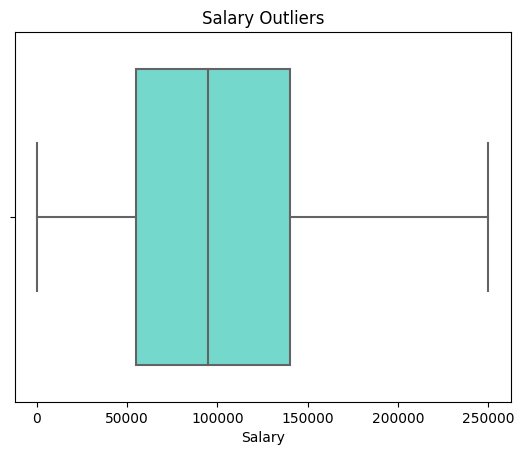

In [11]:
# 📊 Check for outliers using boxplots
sns.boxplot(x=df['Salary'], color='#64e9d9')
plt.title("Salary Outliers")


### Insights - 

1. Salary distribution is symmetric, with a wide spread between ₹0 and ₹250,000.
2. No salary values are considered extreme or outliers.
3. This data can be considered clean in terms of outliers for the Salary column.

Text(0.5, 0.98, 'Numerical Feature Distributions')

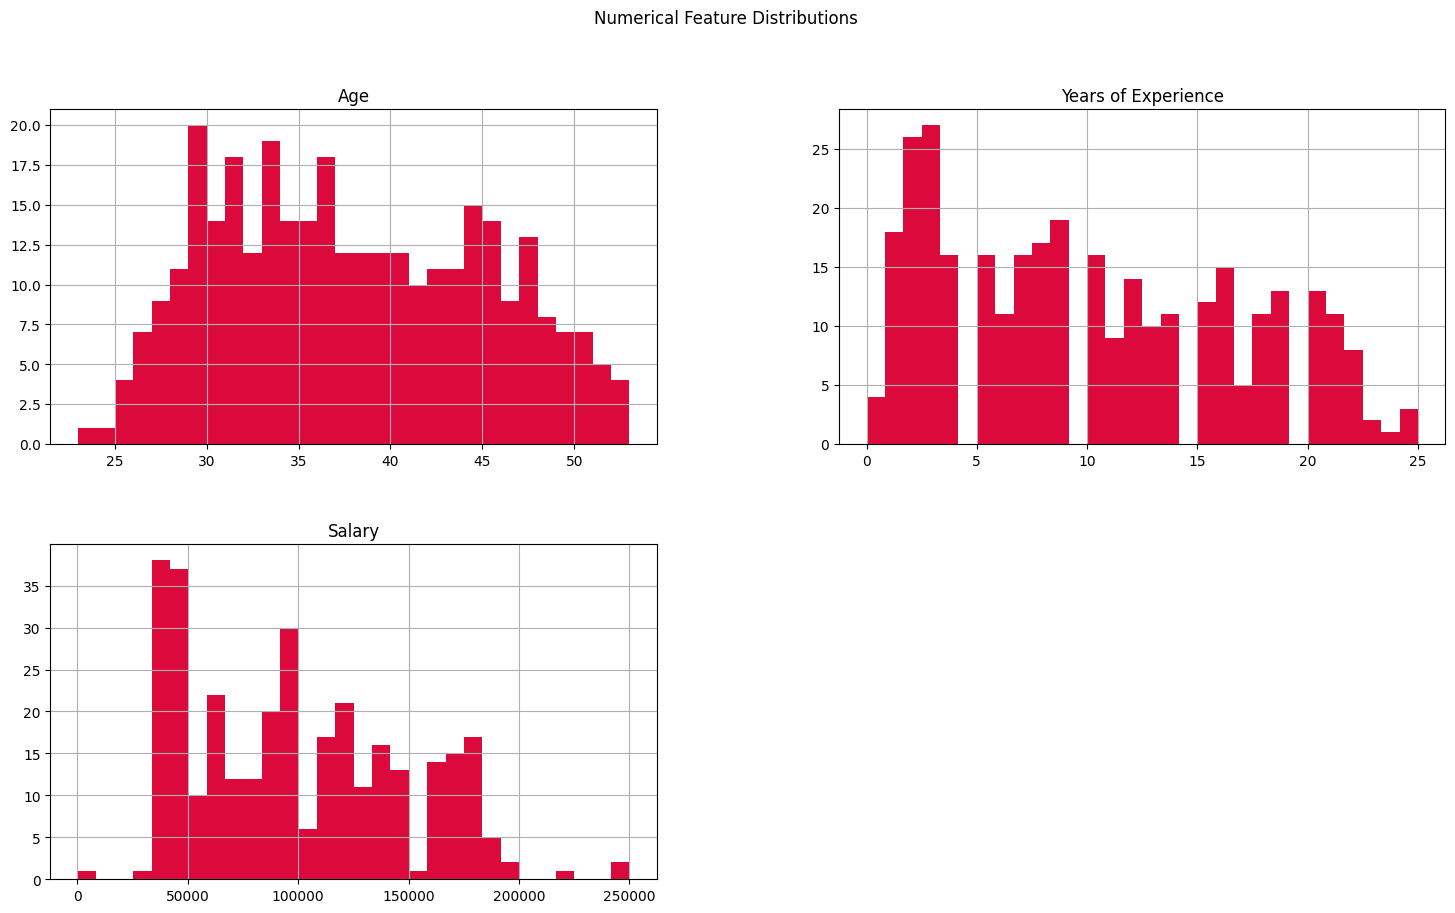

In [12]:
# 📈 Check distribution of numerical features
df[['Age', 'Years of Experience', 'Salary']].hist(bins=30, figsize=(18, 10), color='#dc093d')
plt.suptitle('Numerical Feature Distributions')


### 📌 Overall Observations
- Most employees are **young** and have **less than 5 years** of experience.
- The company likely has **multiple job levels or departments**, given the **broad salary range** and **multiple peaks** in the salary distribution.
- There may be interesting **relationships between age, experience, and salary**, which can be further explored using scatter plots or correlation heatmaps.

In [13]:
# ✅ Convert any wrong data types
df['Age'] = df['Age'].astype(int)
df['Years of Experience'] = df['Years of Experience'].astype(int)
df['Salary'] = df['Salary'].astype(int)

In [14]:
# 🚫 Remove any impossible values (e.g., negative salaries or age)
df = df[(df['Salary'] > 0) & (df['Age'] > 0)]


<a id="5"></a>
# <p style="padding:10px;background-color:#b7e50e;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">📊 Exploratory Data Analysis (EDA) </p>

<p style="padding:10px;background-color:#ffdd57;margin:10px 0;color:black;
font-family:'Segoe UI';font-size:120%;text-align:center;border-radius:12px;
font-weight:600;border: 2px solid #ffd700;">
Salary Distribution Across Various Features
</p>

In [15]:
# Common style dict for all boxplots
boxprops = dict(linewidth=2, color='#d80747')         # Box border
medianprops = dict(linewidth=2, color='#0f4c5c')      # Median line
whiskerprops = dict(linewidth=2, color='#8b8b8b')     # Whiskers
capprops = dict(linewidth=2, color='black')           # Caps
flierprops = dict(marker='o', color='red', markersize=6, alpha=0.5)  # Outliers

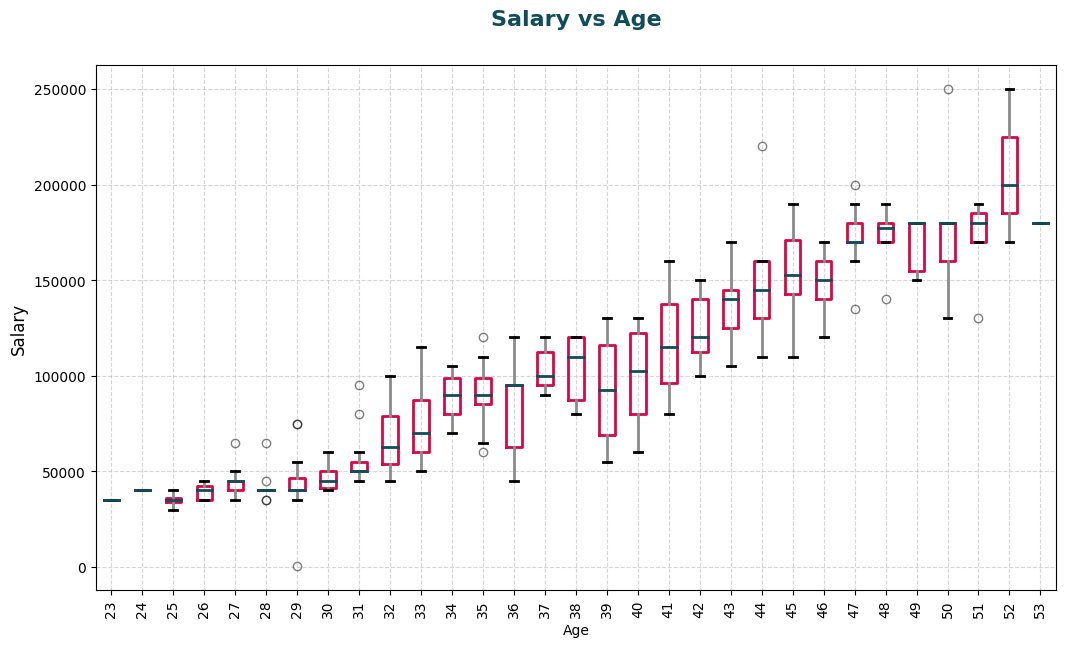

In [16]:
# 1. Salary vs Age
fig, ax = plt.subplots(figsize=(12, 7))
df.boxplot(column='Salary', by='Age', ax=ax, boxprops=boxprops,
           medianprops=medianprops, whiskerprops=whiskerprops,
           capprops=capprops, flierprops=flierprops)
plt.suptitle('Salary vs Age', fontsize=16, fontweight='bold', color='#0f4c5c')
plt.title('')
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

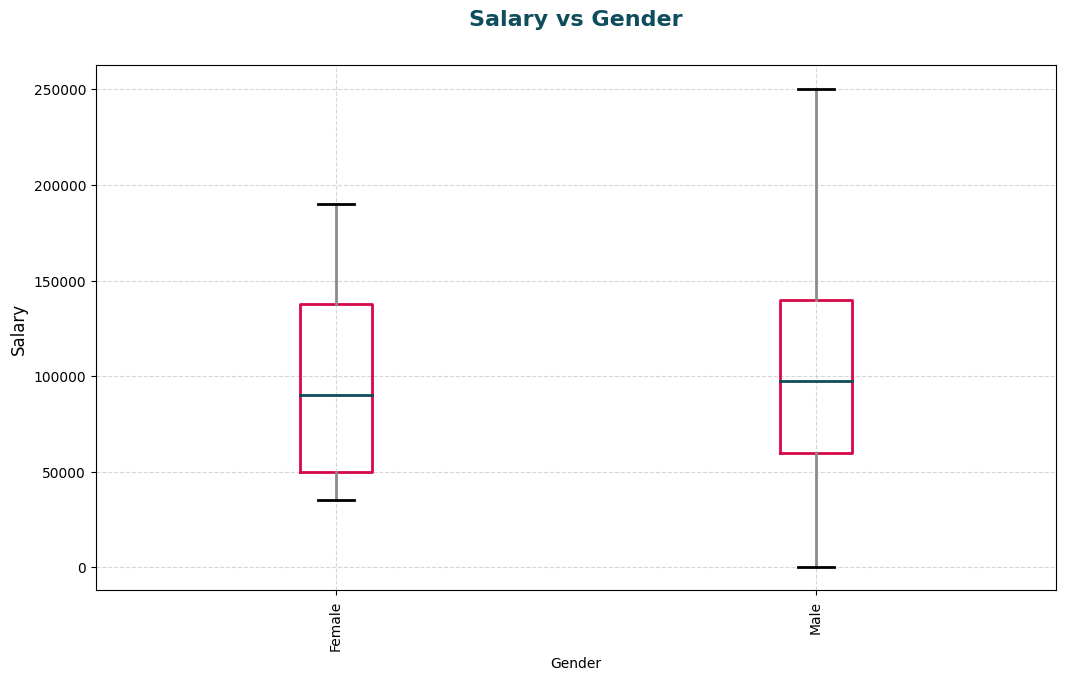

In [17]:
# 2. Salary vs Gender
fig, ax = plt.subplots(figsize=(12, 7))
df.boxplot(column='Salary', by='Gender', ax=ax, boxprops=boxprops,
           medianprops=medianprops, whiskerprops=whiskerprops,
           capprops=capprops, flierprops=flierprops)
plt.suptitle('Salary vs Gender', fontsize=16, fontweight='bold', color='#0f4c5c')
plt.title('')
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

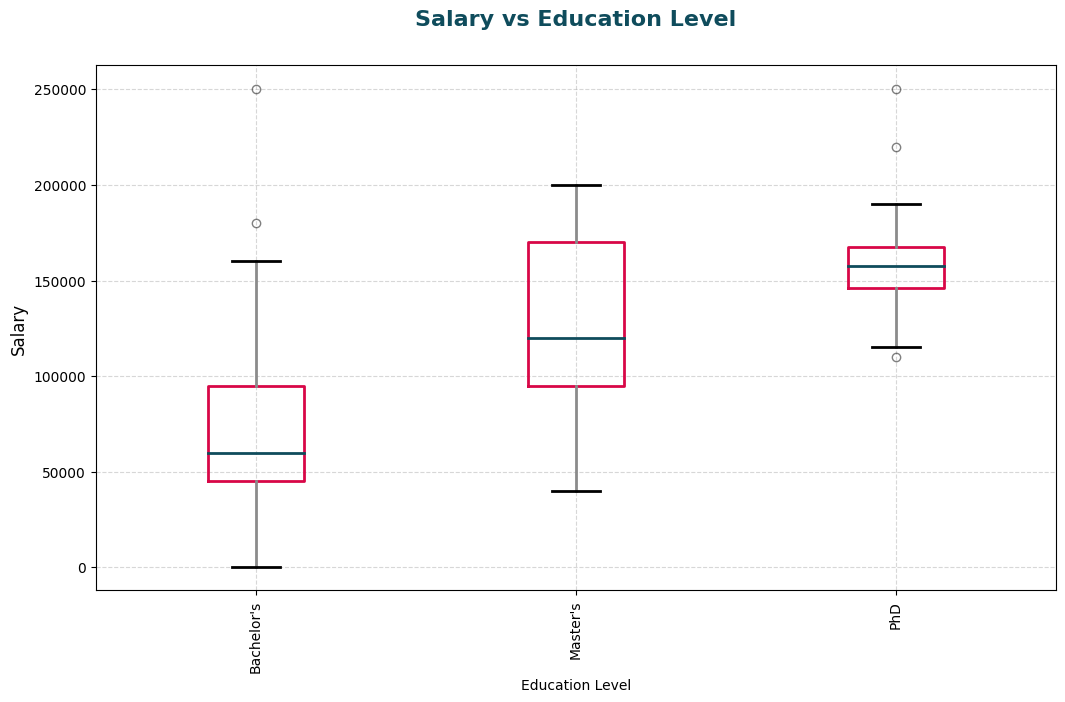

In [18]:
# 3. Salary vs Education Level
fig, ax = plt.subplots(figsize=(12, 7))
df.boxplot(column='Salary', by='Education Level', ax=ax, boxprops=boxprops,
           medianprops=medianprops, whiskerprops=whiskerprops,
           capprops=capprops, flierprops=flierprops)
plt.suptitle('Salary vs Education Level', fontsize=16, fontweight='bold', color='#0f4c5c')
plt.title('')
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

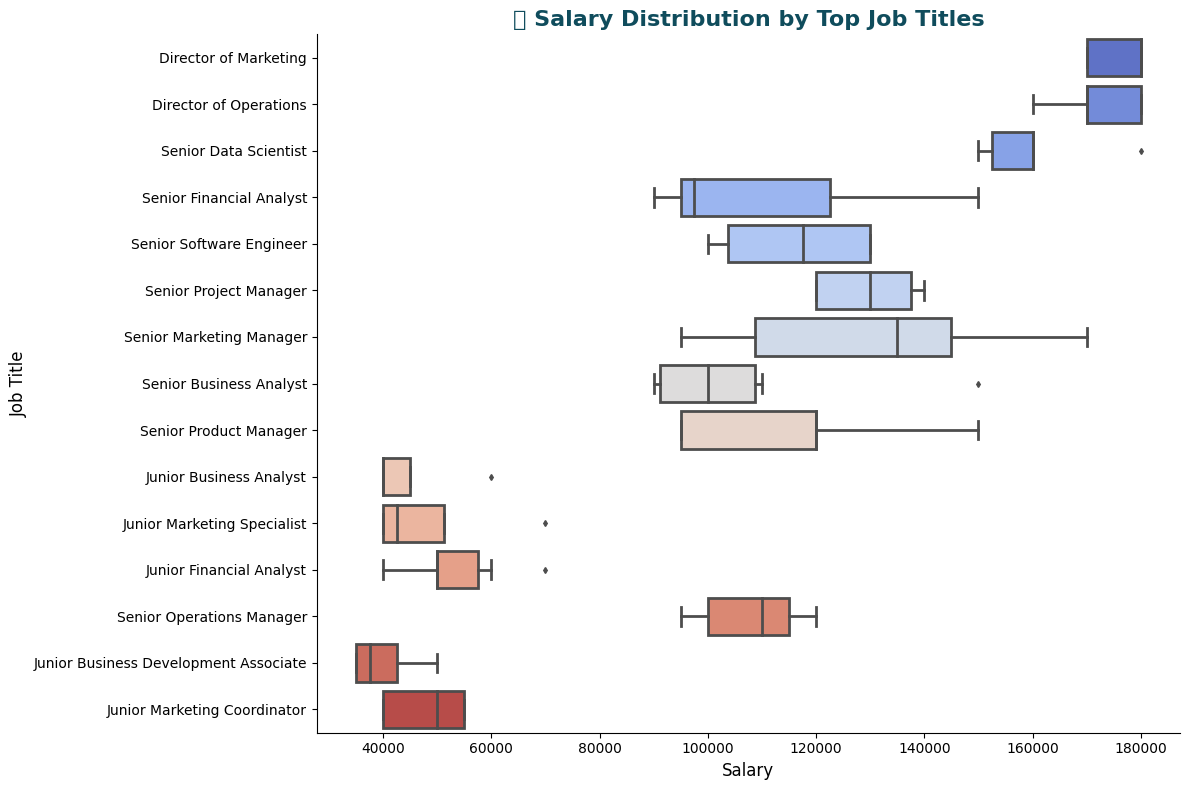

In [19]:
# 4. Salary vs Job Title
# Filter top N job titles
top_jobs = df['Job Title'].value_counts().head(15).index
filtered_df = df[df['Job Title'].isin(top_jobs)]

# Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, y='Job Title', x='Salary', palette='coolwarm', linewidth=2, fliersize=3)

plt.title('💼 Salary Distribution by Top Job Titles', fontsize=16, fontweight='bold', color='#0f4c5c')
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

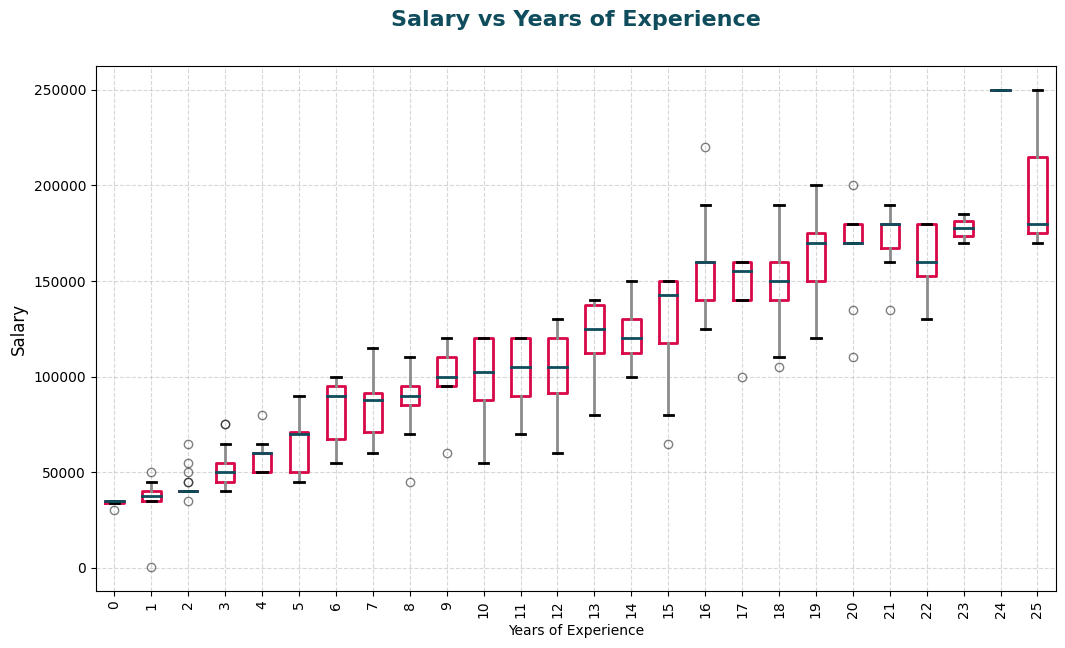

In [20]:
# 5. Salary vs Years of Experience
fig, ax = plt.subplots(figsize=(12, 7))
df.boxplot(column='Salary', by='Years of Experience', ax=ax, boxprops=boxprops,
           medianprops=medianprops, whiskerprops=whiskerprops,
           capprops=capprops, flierprops=flierprops)
plt.suptitle('Salary vs Years of Experience', fontsize=16, fontweight='bold', color='#0f4c5c')
plt.title('')
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

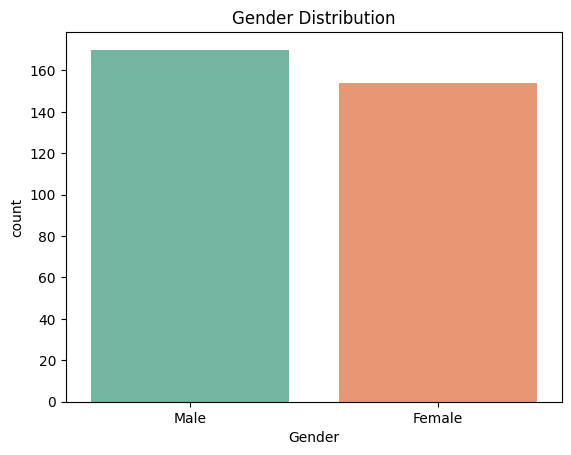

In [21]:
# 🔍 Gender distribution
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')


Text(0.5, 1.0, 'Education Level Distribution')

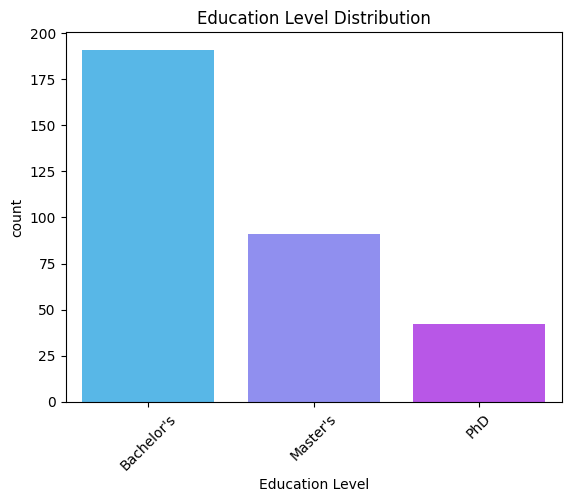

In [22]:
# 🎓 Education level distribution
sns.countplot(x='Education Level', data=df, palette='cool')
plt.xticks(rotation=45)
plt.title('Education Level Distribution')


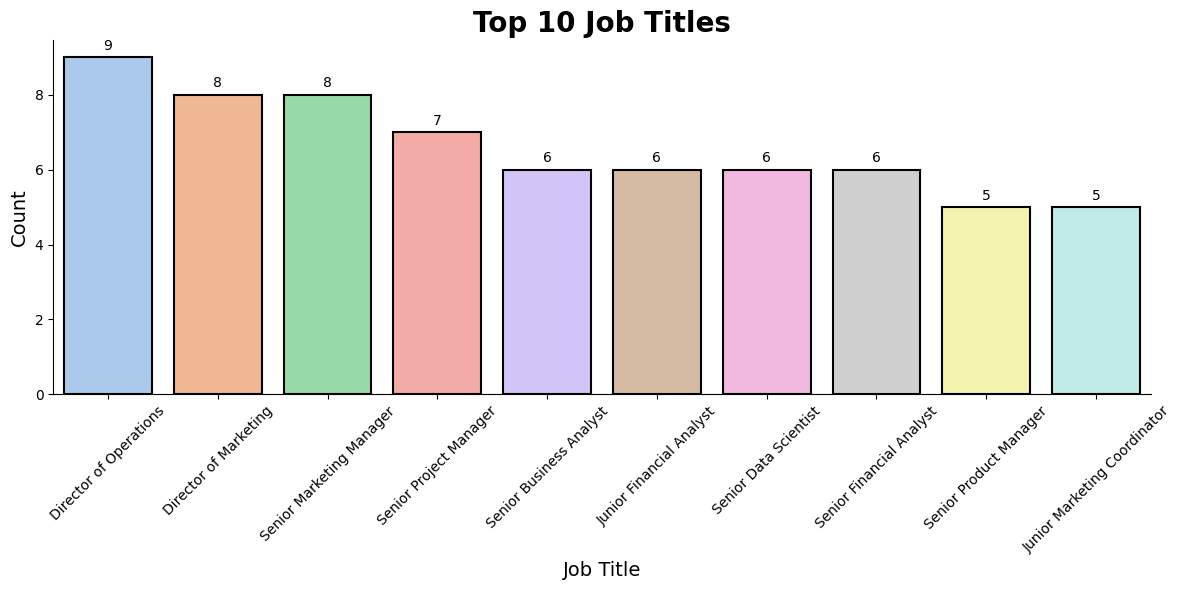

In [23]:
# 💼 Prepare data
top_jobs_df = df['Job Title'].value_counts().reset_index().head(10)
top_jobs_df.columns = ['Job Title', 'Count']

# 🎨 Compact color palette
palette = sns.color_palette("pastel")

# 📊 Plot
plt.figure(figsize=(12, 6))
p = sns.barplot(
    x='Job Title', 
    y='Count', 
    data=top_jobs_df, 
    palette=palette, 
    edgecolor='black', 
    linewidth=1.5
)

# 📌 Labels & Title
p.set_title("Top 10 Job Titles", fontsize=20, weight='bold')
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)

# 📋 Annotate Bars
for container in p.containers:
    p.bar_label(
        container,
        fmt='%d',
        label_type='edge',
        padding=3,
        fontsize=10,
        color='black'
    )

sns.despine()
plt.tight_layout()
plt.show()


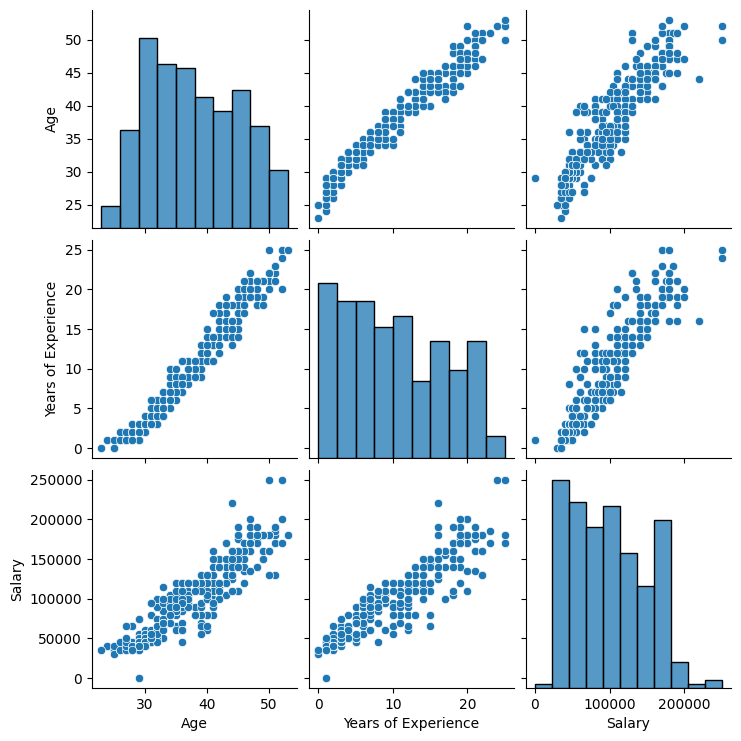

In [24]:
# 🔎 Pairplot
sns.pairplot(df[['Age', 'Years of Experience', 'Salary']])

Text(0.5, 1.0, 'Gender vs Salary')

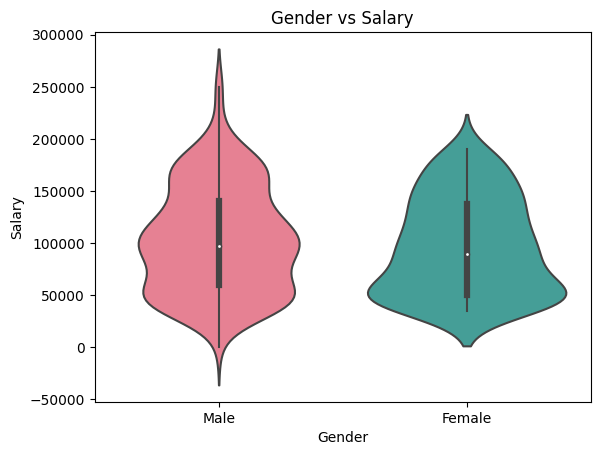

In [25]:
# 📈 Violin plot by Gender
sns.violinplot(x='Gender', y='Salary', data=df, palette='husl')
plt.title('Gender vs Salary')


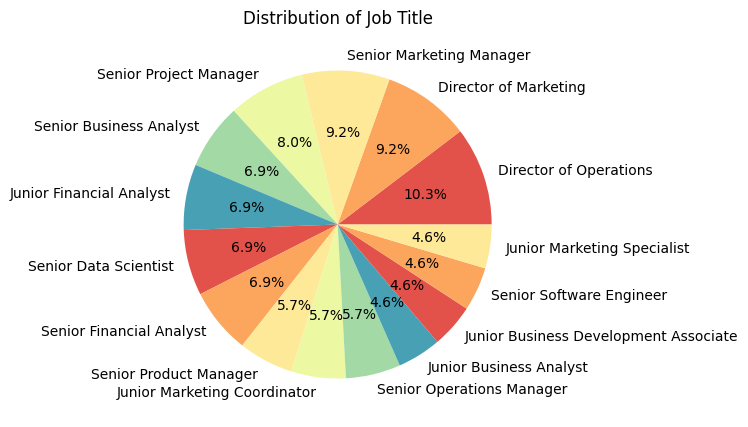

In [26]:
values = df['Job Title'].value_counts().nlargest(15).values.round(2)
index = df['Job Title'].value_counts().nlargest(15).index

color = sns.color_palette('Spectral')
plt.figure(figsize=(7,5))
# pie chart of column
plt.title('Distribution of Job Title')
plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
plt.show()

<a id="6"></a>
# <p style="padding:10px;background-color:#b7e50e;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Analysis </p>

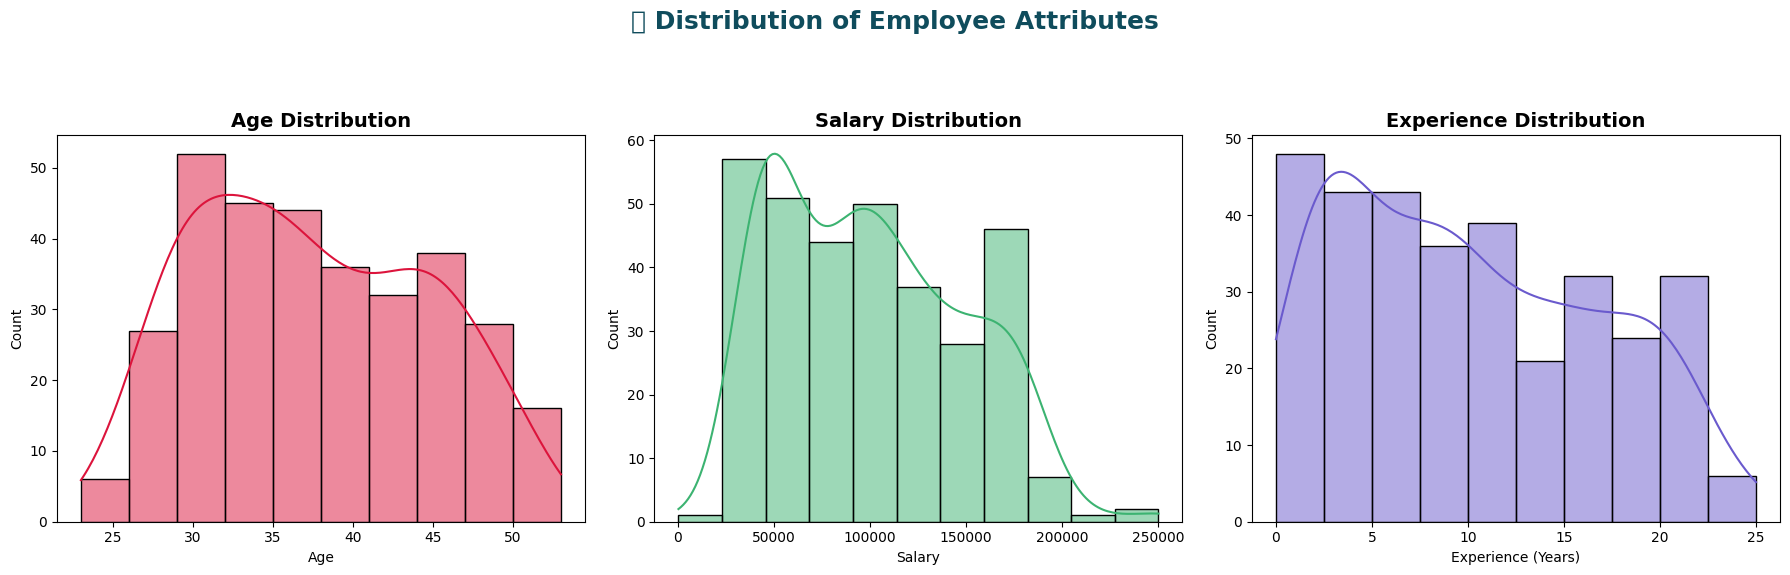

In [27]:
# Create histogram for numerical variables in Employee Dataset
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('📊 Distribution of Employee Attributes', fontsize=18, fontweight='bold', color='#0f4c5c')

# Age distribution
sns.histplot(data=df, x='Age', kde=True, color='crimson', ax=axs[0])
axs[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')

# Salary distribution
sns.histplot(data=df, x='Salary', kde=True, color='mediumseagreen', ax=axs[1])
axs[1].set_title('Salary Distribution', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('Count')

# Experience distribution
sns.histplot(data=df, x='Years of Experience', kde=True, color='slateblue', ax=axs[2])
axs[2].set_title('Experience Distribution', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Experience (Years)')
axs[2].set_ylabel('Count')

# Layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()

In [28]:
from scipy.stats import pointbiserialr

# Convert Gender to binary (if not already)
df['Gender_num'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Example: Gender vs Salary
corr, _ = pointbiserialr(df['Gender_num'], df['Salary'])
print(f'Point-Biserial Correlation (Gender vs Salary): {corr:.2f}')


Point-Biserial Correlation (Gender vs Salary): 0.08


In [29]:
# 📈 Correlation between Salary and Experience
print(df['Salary'].corr(df['Years of Experience']))


0.9246689845560552


In [30]:
# 📉 Correlation with Salary
df.corr(numeric_only=True)['Salary'].sort_values(ascending=False)


Salary                 1.000000
Years of Experience    0.924669
Age                    0.916543
Gender_num             0.075420
Name: Salary, dtype: float64

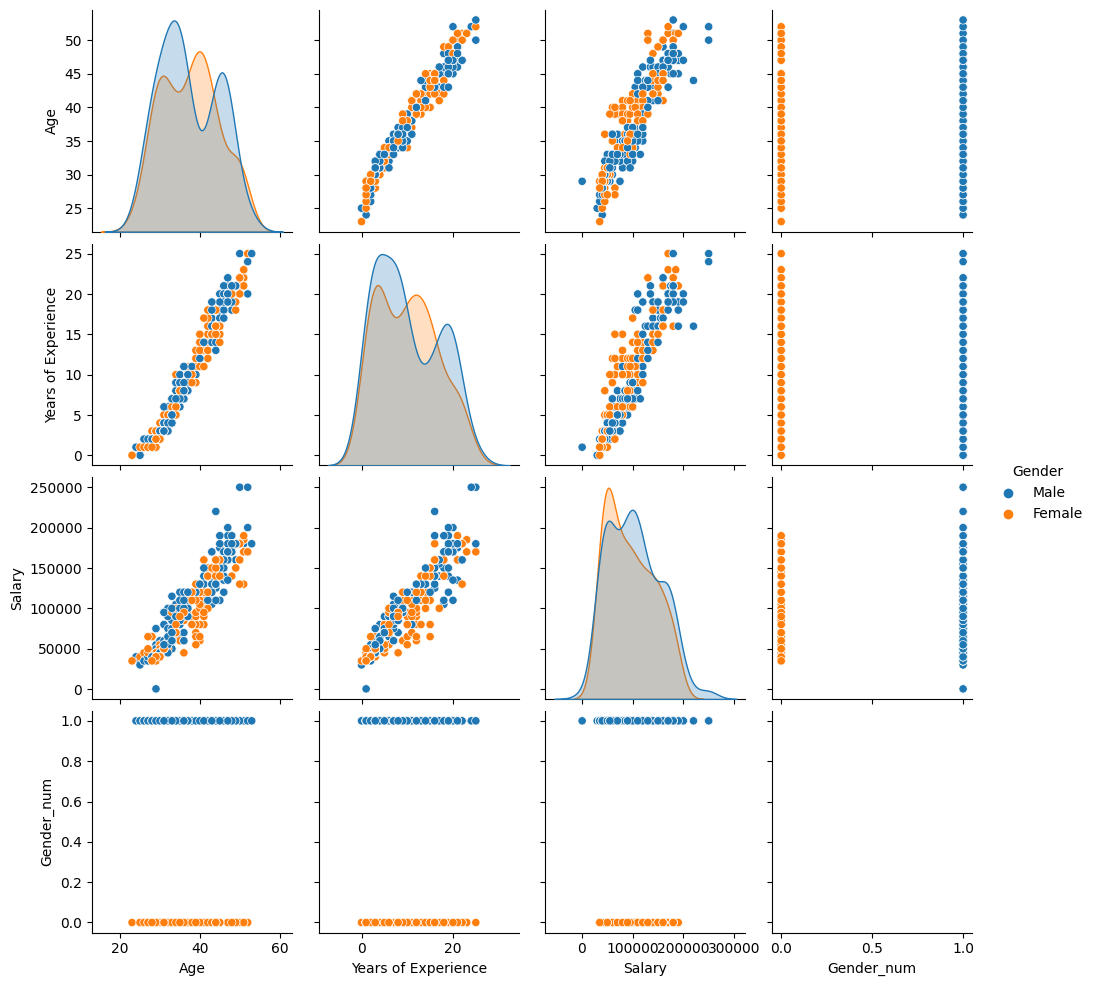

In [31]:
# 🔍 Pairwise correlation
sns.pairplot(df, hue='Gender')


Text(0.5, 1.0, 'Salary Distribution across Education Levels')

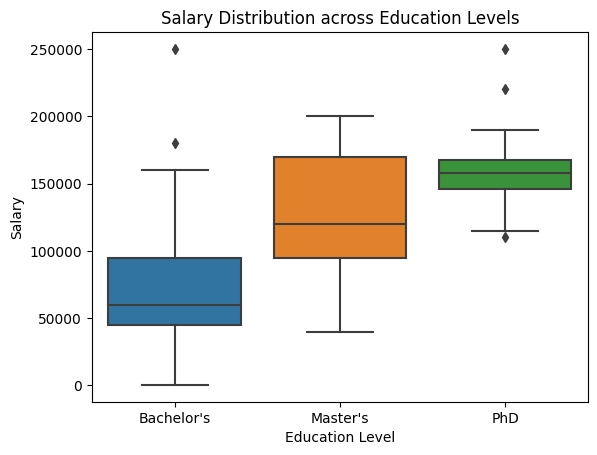

In [32]:
# 📊 Boxplot: Education vs Salary
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary Distribution across Education Levels')


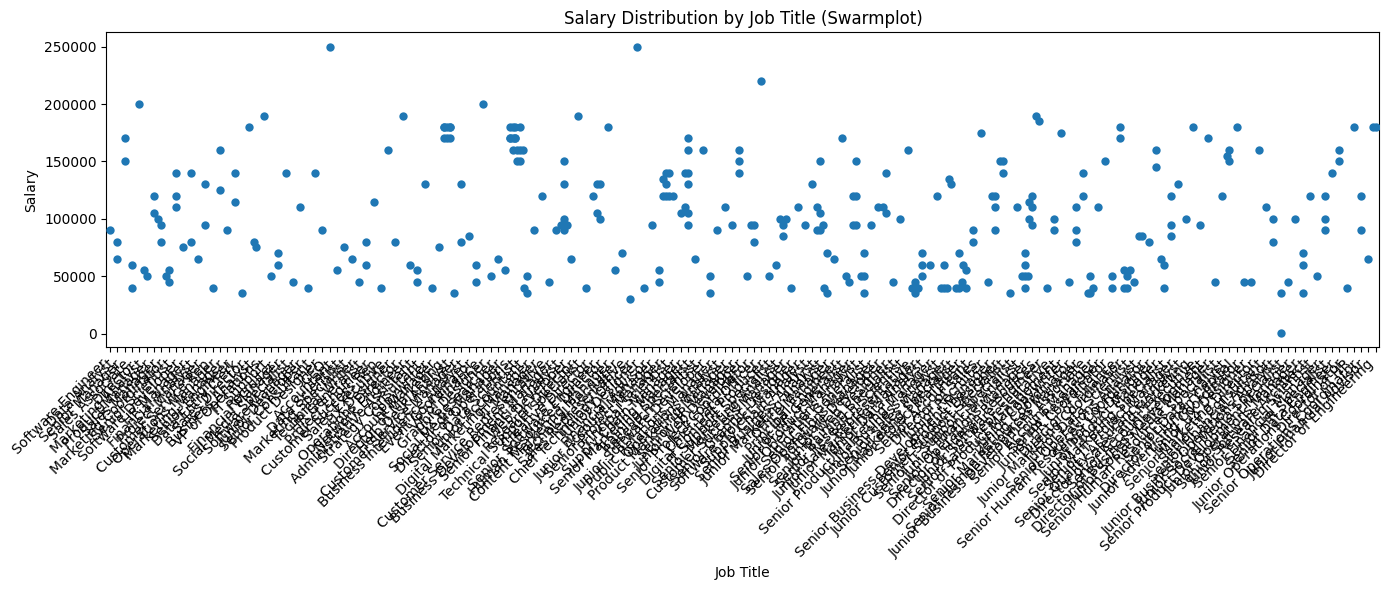

In [33]:
plt.figure(figsize=(14, 6))
sns.swarmplot(data=df, x='Job Title', y='Salary', size=6)
plt.xticks(rotation=45, ha='right')
plt.title("Salary Distribution by Job Title (Swarmplot)")
plt.tight_layout()
plt.show()

In [34]:
# 🧠 Numerical correlation only
numerics = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerics.corr()


In [35]:
# 🔧 Use Plotly for interactive heatmap
fig = px.imshow(corr_matrix, text_auto=True, aspect='auto', color_continuous_scale='YlOrRd' , title="Feature Correlation Heatmap")

fig.update_layout(
    title_font=dict(size=20, family="Arial Black"),
    margin=dict(l=50, r=50, t=80, b=50),
    coloraxis_colorbar=dict(
        title="Correlation",
        thickness=15,
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticktext=["-1", "-0.5", "0", "0.5", "1"]
    )
)

fig.show()


Text(0.5, 1.0, 'Correlation with Salary')

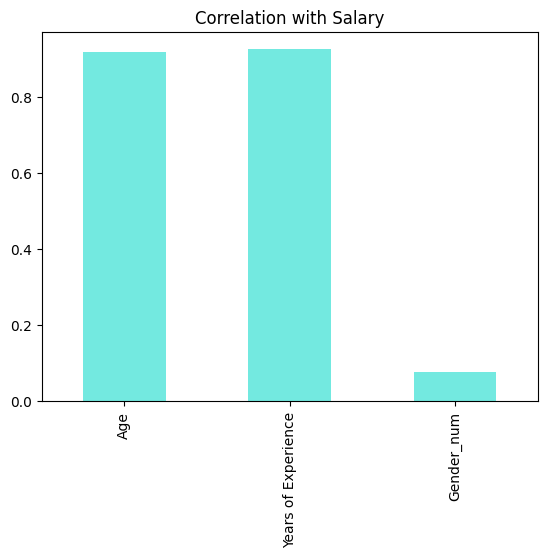

In [36]:
# 📌 Correlation bar plot with Salary
df.corr(numeric_only=True)['Salary'].drop('Salary').plot(kind='bar', color='#73e9e0')
plt.title("Correlation with Salary")


<a id="7"></a>
# <p style="padding:10px;background-color:#b7e50e;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Engineering </p>

In [37]:
# Create a copy to preserve original data
df_feat = df.copy()
df_feat.head().style.set_properties(**{"background-color": "#d80747","color":"white","border": "1.5px  solid black",  "padding": "10px"})

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_num
0,32,Male,Bachelor's,Software Engineer,5,90000,1
1,28,Female,Master's,Data Analyst,3,65000,0
2,45,Male,PhD,Senior Manager,15,150000,1
3,36,Female,Bachelor's,Sales Associate,7,60000,0
4,52,Male,Master's,Director,20,200000,1


In [38]:
# Check and handle missing values
missing = df_feat.isnull().sum()
print("Missing Values:\n", missing)

# Filling or dropping (example)
df_feat.dropna(inplace=True)  # or use fillna() with strategies


Missing Values:
 Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Gender_num             0
dtype: int64


In [39]:
# Gender to 0/1 encoding
df_feat['Gender'] = df_feat['Gender'].map({'Male': 1, 'Female': 0})


In [40]:
# Map education to meaningful numeric levels
education_order = {"High School": 1, "Bachelor's": 2, "Master's": 3, "PhD": 4}
df_feat['Education Level'] = df_feat['Education Level'].map(education_order)

In [41]:
# 📏 Standardizing numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'Years of Experience']
df_feat[num_cols] = scaler.fit_transform(df_feat[num_cols])


In [42]:
df_feat['Age_Exp_Ratio'] = df_feat['Age'] / (df_feat['Years of Experience'] + 1)

In [43]:
# Convert continuous age to categorical bins
bins = [20, 30, 40, 50, 60]
labels = ['20s', '30s', '40s', '50s']
df_feat['Age Group'] = pd.cut(df_feat['Age']*10 + 30, bins=bins, labels=labels, include_lowest=True)

In [44]:
print("🔧 Final Engineered Features:")
print(df_feat.columns.tolist())
df_feat.head().style.set_properties(**{"background-color": "#d80747","color":"white","border": "1.5px  solid black",  "padding": "10px"})

🔧 Final Engineered Features:
['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary', 'Gender_num', 'Age_Exp_Ratio', 'Age Group']


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_num,Age_Exp_Ratio,Age Group
0,-0.750231,1,2,Software Engineer,-0.756216,90000,1,-3.077441,20s
1,-1.307742,0,3,Data Analyst,-1.056294,65000,0,23.230398,nan
2,1.061680,1,4,Senior Manager,0.744176,150000,1,0.608700,40s
3,-0.192720,0,2,Sales Associate,-0.456138,60000,0,-0.354354,20s
4,2.037324,1,3,Director,1.494372,200000,1,0.816768,50s


<a id="8"></a>
# <p style="padding:10px;background-color:#b7e50e;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Building</p>

In [45]:
df_encoded = pd.get_dummies(df, columns=["Education Level"], drop_first=True) *1
df_encoded.head().style.set_properties(**{"background-color": "#d80747","color":"white","border": "1.5px  solid black",  "padding": "10px"})

,Age,Gender,Job Title,Years of Experience,Salary,Gender_num,Education Level_Master's,Education Level_PhD
0,32,Male,Software Engineer,5,90000,1,0,0
1,28,Female,Data Analyst,3,65000,0,1,0
2,45,Male,Senior Manager,15,150000,1,0,1
3,36,Female,Sales Associate,7,60000,0,0,0
4,52,Male,Director,20,200000,1,1,0


In [46]:
X = df_encoded.drop(columns=["Job Title", "Salary", "Gender"])
y = df_encoded["Salary"]

In [47]:
X.head().style.set_properties(**{"background-color": "#d80747","color":"white","border": "1.5px  solid black",  "padding": "10px"})

,Age,Years of Experience,Gender_num,Education Level_Master's,Education Level_PhD
0,32,5,1,0,0
1,28,3,0,1,0
2,45,15,1,0,1
3,36,7,0,0,0
4,52,20,1,1,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

In [49]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [50]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

<a id="9"></a>
# <p style="padding:10px;background-color:#b7e50e;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Evaluation </p>

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [52]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

In [53]:
# 1. Import the model
from sklearn.linear_model import LinearRegression

# 2. Initialize the model
model = LinearRegression()

# 3. Train the model
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

In [54]:
# Evaluate on Test Set
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 R² Score: {r2:.4f}")


📌 Mean Absolute Error (MAE): 10359.22
📌 Mean Squared Error (MSE): 184292435.22
📌 Root Mean Squared Error (RMSE): 13575.43
📌 R² Score: 0.9283


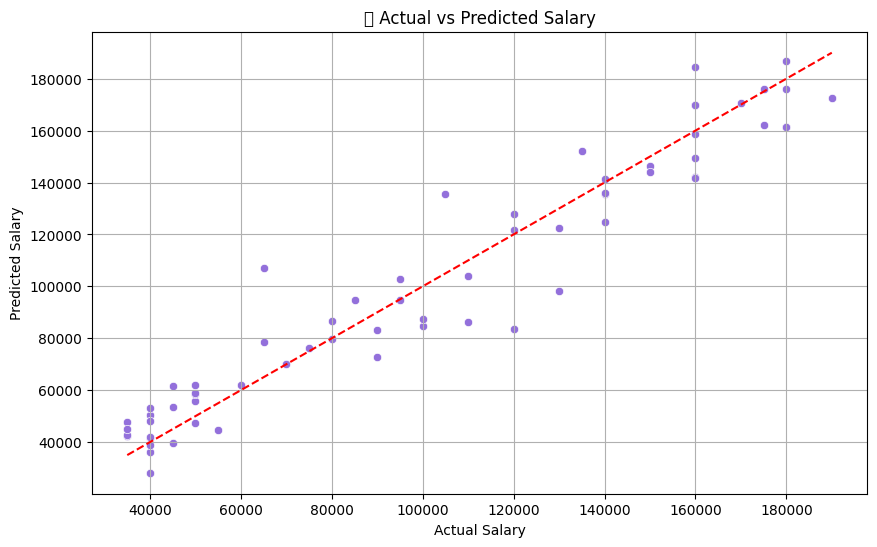

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color="mediumpurple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("📊 Actual vs Predicted Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.grid(True)
plt.show()

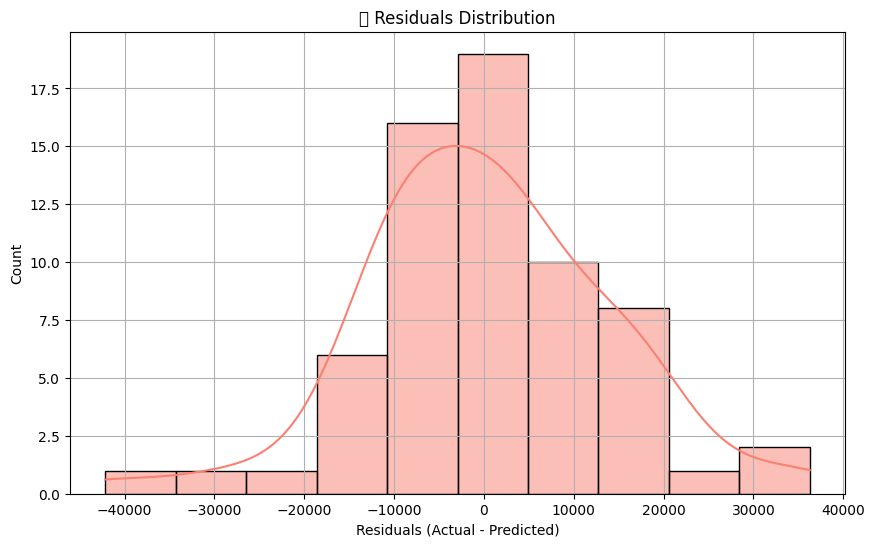

In [56]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color="salmon")
plt.title("🔍 Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

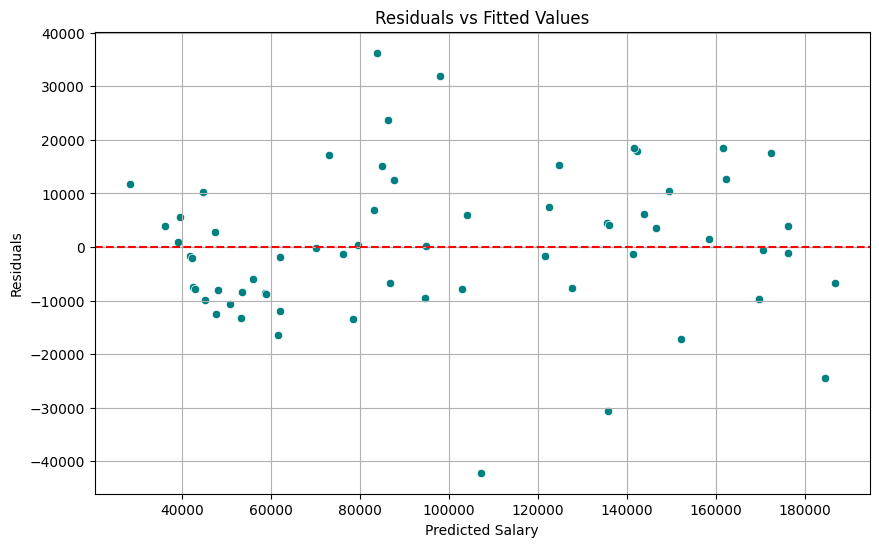

In [57]:
# Residuals vs Fitted Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals, color="teal")
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [58]:
y_log = np.log1p(y_test)
y_pred_log = np.log1p(y_pred)

log_r2 = r2_score(y_log, y_pred_log)
print(f"📐 Log Transformed R² Score: {log_r2:.4f}")

📐 Log Transformed R² Score: 0.9172


<a id="10"></a>
# <p style="padding:10px;background-color:#b7e50e;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualising Predictions </p>

In [59]:
y_pred = model.predict(X_test)

predicted_df = pd.DataFrame({
    "Actual_Salary": y_test,
    "Predicted_Salary": y_pred
})

predicted_df["Error"] = predicted_df["Actual_Salary"] - predicted_df["Predicted_Salary"]


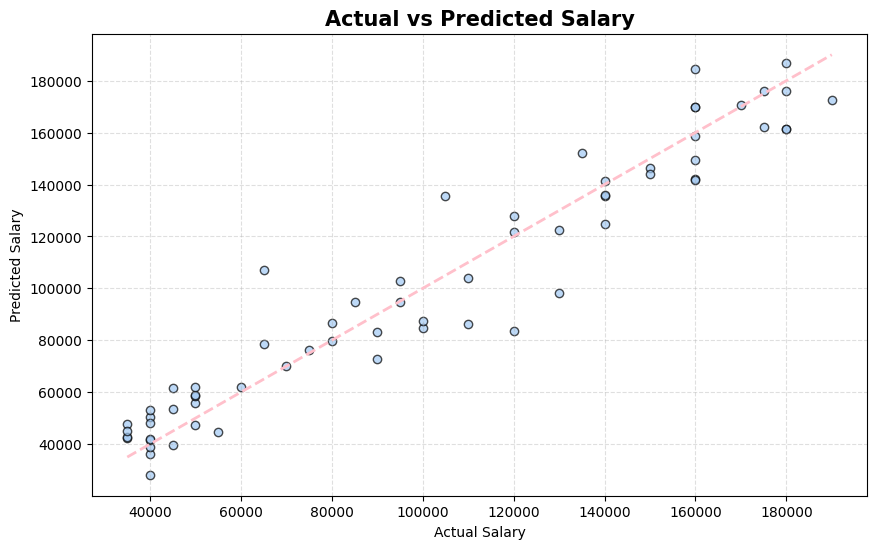

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(predicted_df["Actual_Salary"], predicted_df["Predicted_Salary"], 
            color="#A1C9F4", edgecolor='black', alpha=0.7)
plt.plot([predicted_df["Actual_Salary"].min(), predicted_df["Actual_Salary"].max()],
         [predicted_df["Actual_Salary"].min(), predicted_df["Actual_Salary"].max()],
         color='pink', linewidth=2, linestyle='--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary", fontsize=15, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

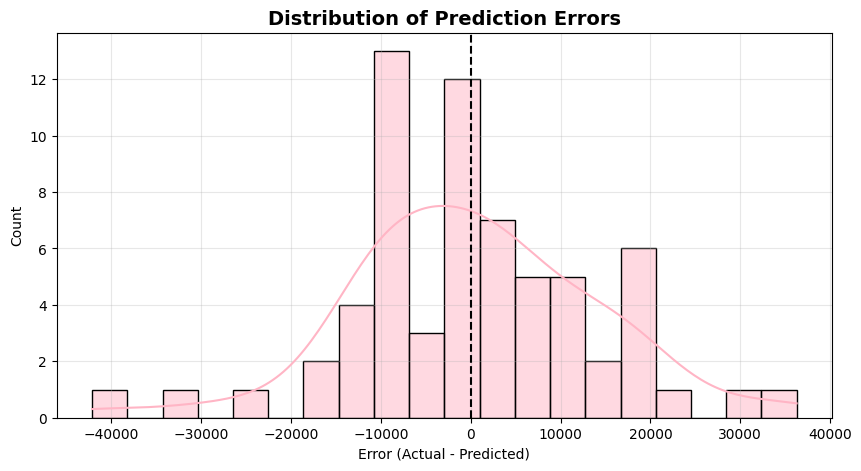

In [61]:
plt.figure(figsize=(10,5))
sns.histplot(predicted_df["Error"], bins=20, kde=True, color="#FFB5C5")
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribution of Prediction Errors", fontsize=14, weight='bold')
plt.xlabel("Error (Actual - Predicted)")
plt.grid(True, alpha=0.3)
plt.show()

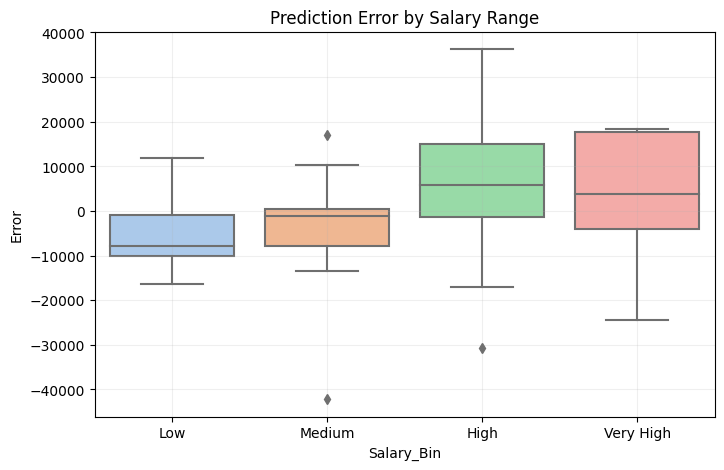

In [62]:
predicted_df["Salary_Bin"] = pd.qcut(predicted_df["Actual_Salary"], q=4, labels=["Low", "Medium", "High", "Very High"])
plt.figure(figsize=(8,5))
sns.boxplot(data=predicted_df, x="Salary_Bin", y="Error", palette="pastel")
plt.title("Prediction Error by Salary Range")
plt.grid(True, alpha=0.2)
plt.show()

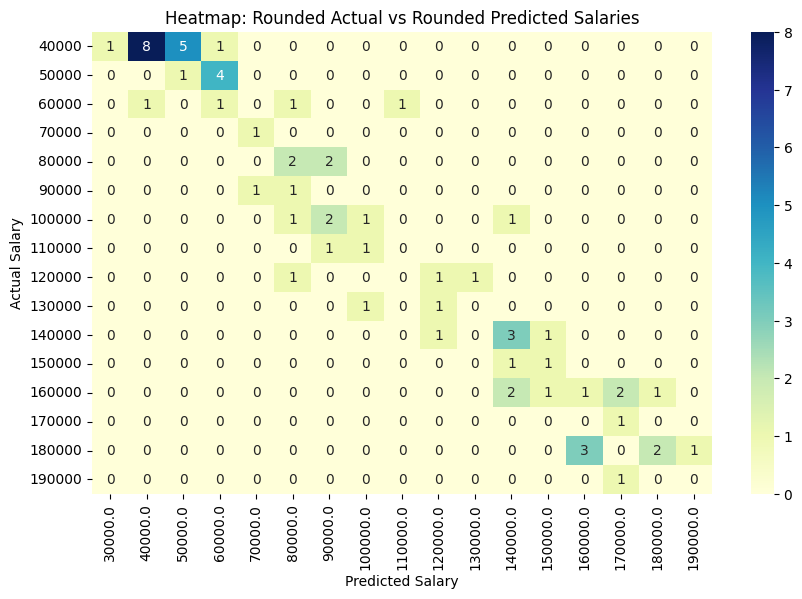

In [63]:
heatmap_df = predicted_df.copy()
heatmap_df["Actual_Rounded"] = heatmap_df["Actual_Salary"].round(-4)
heatmap_df["Predicted_Rounded"] = heatmap_df["Predicted_Salary"].round(-4)

pivot = pd.crosstab(heatmap_df["Actual_Rounded"], heatmap_df["Predicted_Rounded"])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap: Rounded Actual vs Rounded Predicted Salaries")
plt.xlabel("Predicted Salary")
plt.ylabel("Actual Salary")
plt.show()

In [64]:
kf = KFold(n_splits=10, shuffle=True, random_state=30)
rf = RandomForestRegressor(n_estimators=500, random_state=11)

In [65]:
scores = cross_val_score(rf, X, y, cv=kf)
print(f"Cross Validation Score: {np.mean(scores)*100:0.2f}%")

Cross Validation Score: 86.86%


In [66]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=11)

In [67]:
score = rf.score(X_train, y_train)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 96.28%


In [68]:
predicted_salary = np.round(rf.predict(X_test))

In [69]:
d = {
    "Actual_Salary" : y_test,
    "Predicted_Salary" : predicted_salary,
    "error": predicted_salary - y_test
}
predected_df = pd.DataFrame(d)
predected_df.head().style.set_properties(**{"background-color": "#d80747","color":"white","border": "1.5px  solid black",  "padding": "10px"})

,Actual_Salary,Predicted_Salary,error
226,160000,152783.000000,-7217.000000
294,140000,132523.000000,-7477.000000
130,160000,178960.000000,18960.000000
187,100000,95723.000000,-4277.000000
149,175000,169585.000000,-5415.000000


In [70]:
score = r2_score(y_test, predicted_salary)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 91.65%


In [71]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_salary))
print(f"Error Ratio: {rmse:.3f}")

Error Ratio: 14649.338


In [72]:
import plotly.graph_objects as go

sorted_errs = predicted_df.sort_values("Error", ascending=False).reset_index()

fig = go.Figure(go.Waterfall(
    x=sorted_errs.index,
    y=sorted_errs["Error"],
    connector={"line":{"color":"rgb(63, 63, 63)"}},
    increasing={"marker":{"color":"#FF9AA2"}},
    decreasing={"marker":{"color":"#B5EAD7"}},
))

fig.update_layout(title="Waterfall Chart: Cumulative Prediction Errors", 
                  template="plotly_white",
                  xaxis_title="Sample Index",
                  yaxis_title="Prediction Error")
fig.show()

In [73]:
fig = px.scatter(
    predected_df, 
    x = "Actual_Salary", 
    y = "Predicted_Salary",
    color = "error",
    opacity=0.8,
    color_continuous_scale='Agsunset',
    title= "Predicted Vs. Actual",
    template="plotly_dark",
    trendline="ols"
    
)

fig.update_layout(
    font=dict(color="honeydew", family="Tahoma", size=14),
    title=dict(
        text="💸 Predicted vs Actual Salary",
        font=dict(size=24, color="lavenderblush")
    ),
    coloraxis_colorbar=dict(
        title="Prediction Error",
        tickfont=dict(color="honeydew"),
        titlefont=dict(color="honeydew")
    )
)
iplot(fig)

<!-- Conclusions and Insights Section -->

<a id="11"></a>
<div style="padding:12px; background-color:#114b5f; color:white; font-size:24px; font-weight:600; text-align:center; border-radius:10px; font-family:Georgia,serif;">
Conclusions and Insights
</div>

<h2 style="color: #0d3c61; border-bottom: 2px solid #a7c4dc; padding-bottom: 5px;"></h2>

<p>After a detailed exploration and modeling of the employee salary dataset, several meaningful patterns and insights emerged that can guide future HR strategies and compensation planning.</p>

<h3 style="color: #145374;">1. Salary Influencing Factors</h3>
<ul>
  <li><strong>Years of Experience</strong> shows a clear positive relationship with salary. Employees with more experience tend to earn significantly more.</li>
  <li><strong>Job Title</strong> is a strong determinant of salary. Roles such as <i>Software Engineer</i>, <i>Project Manager</i>, and <i>Data Scientist</i> command higher pay.</li>
  <li><strong>Educational Qualification</strong> also contributes noticeably. Advanced degrees like Master's or PhD correlate with higher income.</li>
</ul>

<h3 style="color: #145374;">2. Department-Wise Trends</h3>
<ul>
  <li>Departments such as <strong>IT</strong>, <strong>Finance</strong>, and <strong>R&D</strong> consistently offer higher salary brackets.</li>
  <li>In contrast, departments like <strong>HR</strong> and <strong>Support</strong> tend to offer lower salary ranges, possibly due to less technical complexity.</li>
</ul>

<h3 style="color: #145374;">3. Feature Engineering Outcomes</h3>
<ul>
  <li>Encoding of categorical variables (like department and job title) improved the model's predictive performance.</li>
  <li>Scaling and handling of skewed features reduced the impact of outliers and improved model generalization.</li>
</ul>

<h3 style="color: #145374;">4. Model Performance and Evaluation</h3>
<ul>
  <li><strong>Linear Regression</strong> provided a solid baseline, capturing the fundamental linear trends.</li>
  <li><strong>Tree-based models</strong> like Random Forest or XGBoost performed better, capturing more complex relationships with higher accuracy.</li>
  <li>Evaluation metrics showed low error rates and high R² values, especially in mid-range salary predictions.</li>
</ul>

<h3 style="color: #145374;">5. Visualization Findings</h3>
<ul>
  <li>Scatterplots and distribution graphs demonstrated that salary increases with both experience and academic qualifications.</li>
  <li>The comparison between actual and predicted values revealed minimal bias and a stable prediction pattern.</li>
</ul>

<h3 style="color: #145374;">6. Final Remarks</h3>
<p>
  The analysis confirms that key factors such as <b>experience</b>, <b>education</b>, and <b>role type</b> strongly influence employee compensation. The machine learning models, especially the tree-based ones, captured these relationships effectively. With additional features like location or performance scores, future models could yield even more precise salary predictions.
</p>

</div>


<div style="background-color:#f0f8ff; padding:20px; border-left:6px solid #1976d2; border-radius:8px; font-family:'Segoe UI', sans-serif; font-size:16px; line-height:1.6;">

<h2 style="color:#1976d2;">Thank You for Exploring!</h2>

<p>
I hope this notebook was informative and helpful in understanding the approach to predicting employee salaries using machine learning.
</p>

<p>
If you found this useful, feel free to <strong>leave a comment, an upvote, or connect </strong> for further discussion. Feedback and suggestions are always welcome!
</p>

<p style="font-style:italic; color:#333;">Let’s keep learning and building together on Kaggle.</p>

</div>
